In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

In [17]:
n = 100
heads = 61

In [29]:
# 사전분포 및 사후분포
a, b = 10, 10
prior = stats.beta(a,b)
post = stats.beta(heads+a, n-heads-b)

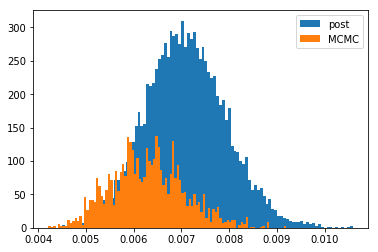

In [78]:
# 사전분포 및 사후분포 히스토그램
n = 10000
plt.hist(prior.rvs(size=n),bins=100, label='prior')
plt.hist(post.rvs(size=n),bins=100, label='post')
plt.hist(tr['beta'], bins=100, label='MCMC')
plt.legend()
plt.show()

In [21]:
# 사후분포 샘플링
niter = 2000
with pm.Model() as coin:
    p = pm.Beta('beta', alpha=2, beta=2)
    y = pm.Binomial('binomial', n=n, p=p, observed=heads)
    trace = pm.sample(niter)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_logodds__]


In [35]:
with coin:
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=4, reandom_seed=123)

logp = -6.2767, ||grad|| = 0.0052043: 100%|███| 14/14 [00:00<00:00, 608.32it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [beta_logodds__]
The number of effective samples is smaller than 25% for some parameters.


In [54]:
p = trace.get_values('beta', burn=niter//2, combine=True, chains=[0,2])

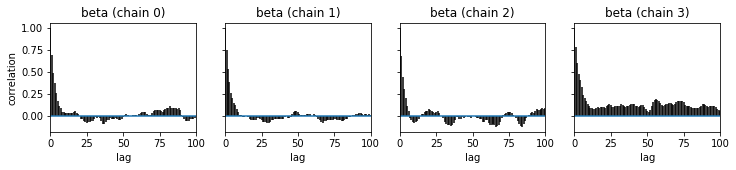

In [59]:
pm.autocorrplot(tr, varnames=['beta'])
pass

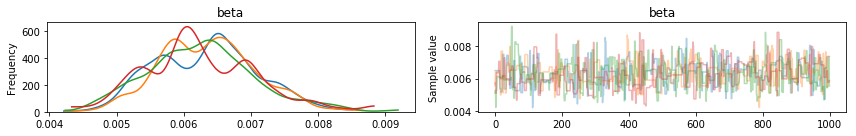

In [61]:
pm.traceplot(tr, varnames=['beta'])
pass

In [64]:
with coin:
    ppc = pm.sample_ppc(tr, samples=100)

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 2437.43it/s]


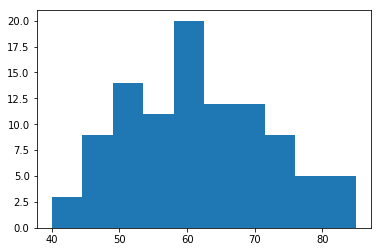

In [69]:
plt.hist(ppc['binomial'].ravel())
pass

In [92]:
niter = 2000
with pm.Model() as prior_context:
    #sigma = pm.Gamma('gamma', alpha=2.0, beta=1.0)
    mu = pm.Normal('mu', mu=0, sd=10)
    trace = pm.sample(niter, step=pm.Metropolis())

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [mu]
The number of effective samples is smaller than 25% for some parameters.


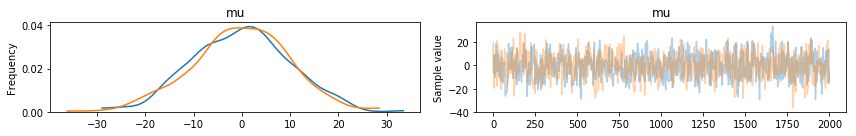

In [98]:
pm.traceplot(trace, varnames=['mu'])
pass

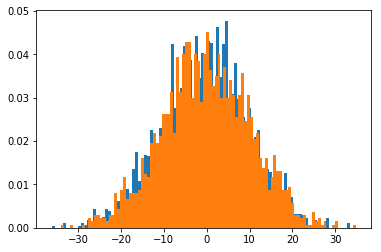

In [96]:
x = stats.norm(loc=0, scale=10)
plt.hist(trace['mu'], normed=True, bins=100)
plt.hist(x.rvs(niter), normed=True, bins=100)
pass

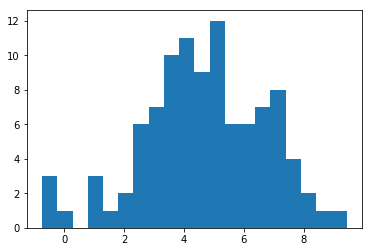

In [2]:
xs = np.random.normal(loc=5, scale=2, size=100)
plt.hist(xs, bins=20)
pass

In [3]:
niter = 2000
with pm.Model() as normal_context:
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfCauchy('sd', beta=2)
    y = pm.Normal('y', mu=mu, sd=sd, observed=xs)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(niter, start=start, step=step)

logp = -226.92, ||grad|| = 16.068: 100%|███████| 19/19 [00:00<00:00, 84.39it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, mu]


100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 2163.05it/s]


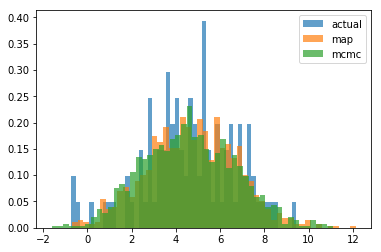

In [19]:
with normal_context:
    ppc = pm.sample_ppc(trace, samples=1000)

#y0 = np.random.normal(loc=0, scale=100, size=1000)
ym = np.random.normal(loc=start['mu'], scale=start['sd'], size=1000)
ys = ppc['y']
plt.hist(xs, bins=50, label='actual', alpha=0.7, normed=True)
plt.hist(ym, bins=50, label='map', alpha=0.7, normed=True)
plt.hist(ys, bins=50, label='mcmc', alpha=0.7, normed=True)
plt.legend()

pass

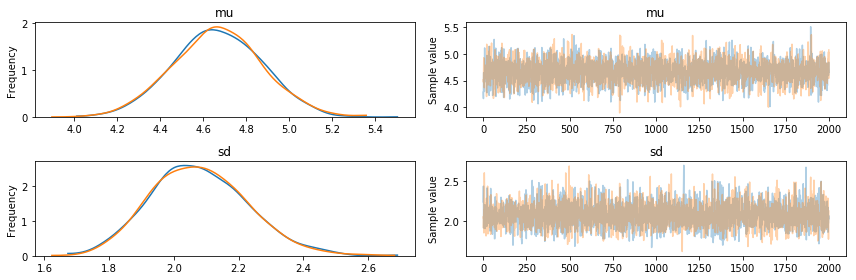

In [7]:
pm.traceplot(trace)
pass

In [12]:
# 원래 답은 mu=5, sd=2
trace['mu'].mean(), trace['sd'].mean()

(4.665175963040229, 2.0768126470946813)